# Implementing k-Nearest neighbors

k-Nearest neighbors is a relatively simple algorithm that attempts to predict a target. It takes an instance of data and attempts to predict the target variable by looking at a set of Nearest neighbors (number of neighbors is equal to a variable that we set - k) to that instance. 

We will test this against the popular Iris Dataset

This dataset is also sometimes used for simple recommendation engines by returning the neighbors for a particular instance.

Thanks to machinelearningmastery.com for this walkthrough:
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

## Import Libraries

In [1]:
from csv import reader
from math import sqrt
from random import seed
from random import randrange
from copy import deepcopy

In [2]:
from matplotlib import pyplot as plt

## Create k-Nearest Neighbors prediction

In [3]:
# assume that the last column is the target variable
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance+=(row1[i] - row2[i])**2
    return sqrt(distance)

In [4]:
def get_k_neighbors(train, instance, k):
    distances = []
    for row in train:
        dist = euclidean_distance(row, instance)
        distances.append((row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

In [5]:
def predict_k_neighbors(train, instance, k):
    neighbors = get_k_neighbors(train, instance, k)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [6]:
def k_nearest_neighbors(train, to_predict, k):
    predictions = []
    col_mins = []
    col_maxs = []
    for i in range(len(train[0])-1):
        values_in_col = [row[i] for row in train]
        col_min = min(values_in_col)
        col_max = max(values_in_col)
        col_mins.append(col_min)
        col_maxs.append(col_max)
    train_norm = deepcopy(train)
    for row in train_norm:
        for i in range(len(row)-1):
            row[i] = (row[i] - col_mins[i])/(col_maxs[i] - col_mins[i])
    to_predict_norm = deepcopy(to_predict)
    for row in to_predict_norm:
        for i in range(len(row)-1):
            row[i] = (row[i] - col_mins[i])/(col_maxs[i] - col_mins[i])
        output = predict_k_neighbors(train_norm, row, k)
        predictions.append(output)
    return(predictions)

## Test algorithm against Iris Dataset

In [7]:
dataset = []
with open('iris.csv', 'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
        if not row:
            continue
        for i in range(len(row)-1):
            row[i] = float(row[i])
        dataset.append(row)

In [8]:
dataset[:5]

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
 [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
 [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']]

In [9]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = []
    for validation_fold in folds:
        train_set = [row for row in dataset if not(row in validation_fold)]
        predicted = algorithm(train_set, validation_fold, *args)
        actual = [row[-1] for row in validation_fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [10]:
def cross_validation_split(dataset, n_folds):
    dataset_folds = []
    dataset_copy = dataset.copy()
    fold_size = int(len(dataset_copy)/n_folds)
    for _ in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            rand_index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(rand_index))
        dataset_folds.append(fold)
    return dataset_folds

In [11]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct+=1
    return correct / float(len(actual)) * 100.0

In [12]:
seed(123)
scores = evaluate_algorithm(dataset, k_nearest_neighbors, 5, 5)
print(f'Scores: {scores}')
print(f'Mean Accuracy: {sum(scores)/float(len(scores)):.2f}')

Scores: [96.66666666666667, 96.66666666666667, 90.0, 93.33333333333333, 100.0]
Mean Accuracy: 95.33


## Test various k values

In [13]:
# using cross validation (with 5 folds) to test different k values
k_values = [1,3]
k_values.extend([5*i for i in range(1,21)])
mean_accuracies = {}
for k in k_values:
    seed(123)
    scores = evaluate_algorithm(dataset, k_nearest_neighbors, 5, k)
    mean_accuracies[k] = sum(scores)/float(len(scores))
for k, ma in mean_accuracies.items():
    print(f'{k}: {ma:.2f}%')

1: 95.33%
3: 94.67%
5: 95.33%
10: 95.33%
15: 96.00%
20: 96.00%
25: 96.00%
30: 94.00%
35: 92.67%
40: 90.67%
45: 88.67%
50: 90.00%
55: 88.67%
60: 88.67%
65: 88.00%
70: 78.00%
75: 62.67%
80: 57.33%
85: 54.00%
90: 53.33%
95: 52.67%
100: 52.67%


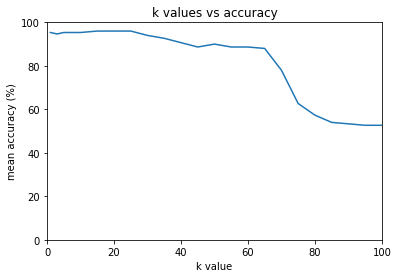

In [14]:
x = [item[0] for item in mean_accuracies.items()]
y = [item[1] for item in mean_accuracies.items()]
plt.figure()
plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('mean accuracy (%)')
plt.axis([0, 100, 0, 100])
plt.title('k values vs accuracy')
plt.show()